In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [19]:
import ipywidgets as widgets
import io 
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

**Folder Path**

In [20]:
X_train = []
Y_train = []
image_size = 150
labels = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]

for i in labels:
    folderPath = os.path.join("/kaggle/input/brain-tumor-classification-mri/Testing",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join("/kaggle/input/brain-tumor-classification-mri/Training",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)        
        

X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [21]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

**Train Test Split**

In [22]:
X_train,X_test,y_train,y_test =  train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [23]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new    
Y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new    
Y_test = tf.keras.utils.to_categorical(y_test)

**CNN Model**

In [32]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))         
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
          
model.add(Dense(4,activation='softmax'))          


In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_12 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [36]:
model.compile(loss = "categorical_crossentropy",optimizer="Adam",metrics = ["accuracy"])

In [39]:
history = model.fit(X_train,Y_train,epochs=50,validation_split= 0.1)

Epoch 1/50


2023-04-06 19:28:56.612811: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


83/83 [==============================] - 16s 66ms/step - loss: 2.1087 - accuracy: 0.2864 - val_loss: 1.3283 - val_accuracy: 0.3231
Epoch 2/50
83/83 [==============================] - 5s 55ms/step - loss: 1.1533 - accuracy: 0.4718 - val_loss: 1.1544 - val_accuracy: 0.5476
Epoch 3/50
83/83 [==============================] - 5s 55ms/step - loss: 0.9912 - accuracy: 0.5660 - val_loss: 0.8807 - val_accuracy: 0.6327
Epoch 4/50
83/83 [==============================] - 5s 55ms/step - loss: 0.8786 - accuracy: 0.6137 - val_loss: 0.9013 - val_accuracy: 0.6190
Epoch 5/50
83/83 [==============================] - 5s 55ms/step - loss: 0.7934 - accuracy: 0.6580 - val_loss: 0.9179 - val_accuracy: 0.5952
Epoch 6/50
83/83 [==============================] - 5s 56ms/step - loss: 0.7243 - accuracy: 0.6947 - val_loss: 0.9785 - val_accuracy: 0.5850
Epoch 7/50
83/83 [==============================] - 5s 55ms/step - loss: 0.6512 - accuracy: 0.7317 - val_loss: 0.9067 - val_accuracy: 0.6429
Epoch 8/50
83/83 [=====

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

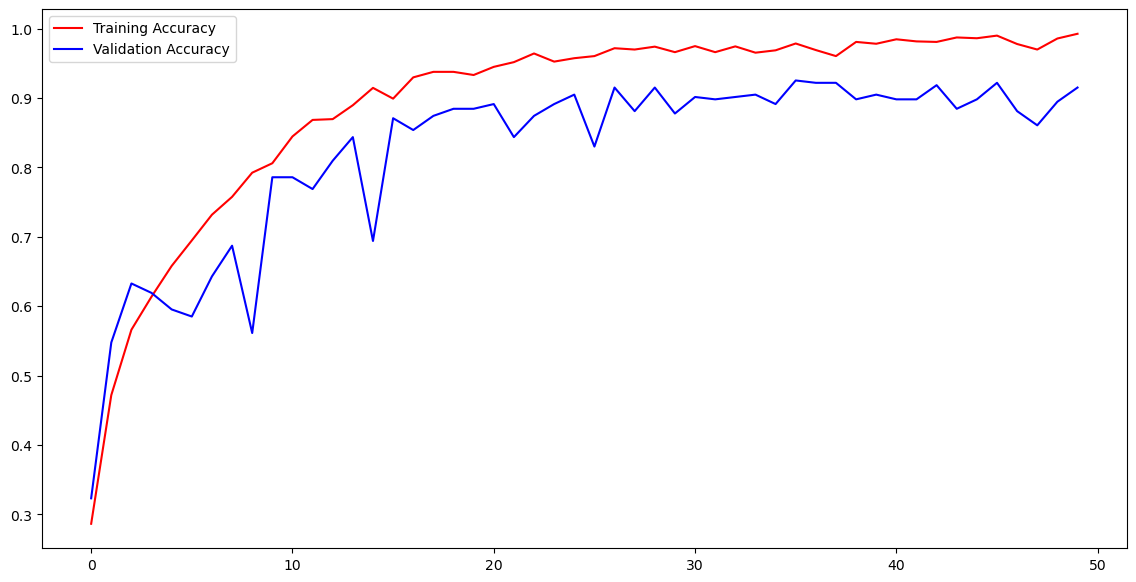

In [46]:
model.save("BrainTumor.h5")
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc = 'upper left')
plt.show()

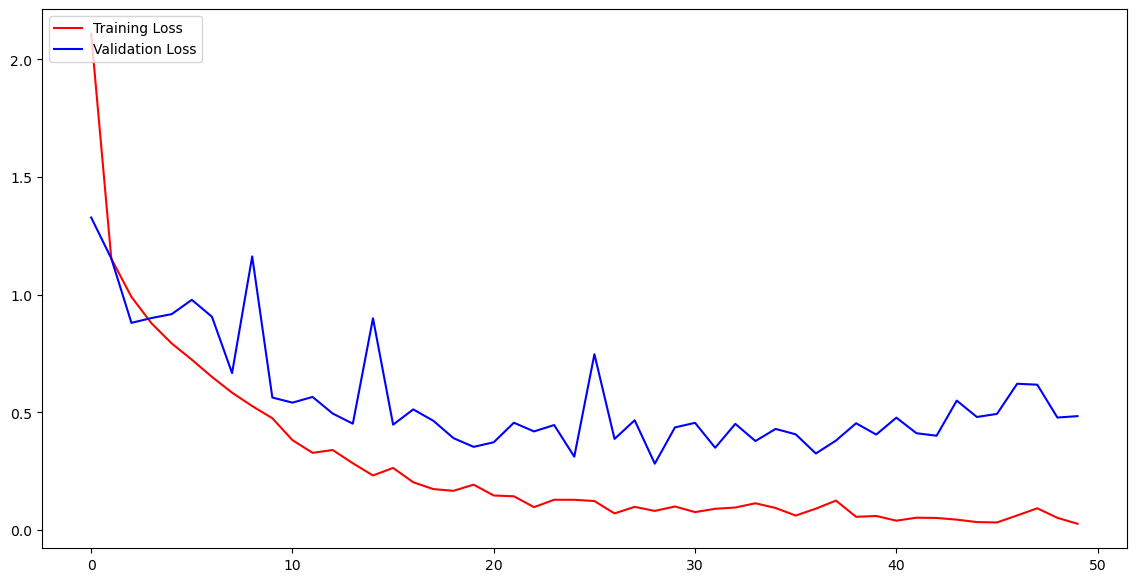

In [49]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training Loss")
plt.plot(epochs,val_loss,'b',label="Validation Loss")
plt.legend(loc = 'upper left')
plt.show()

**Prediction**

In [56]:
img = cv2.imread("/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/image(11).jpg")
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [57]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

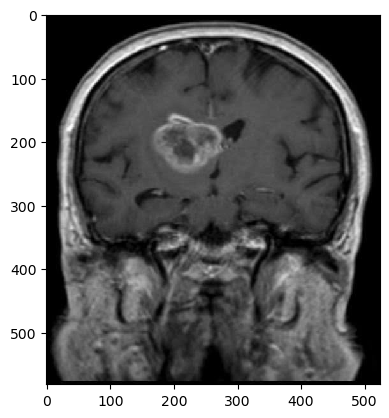

In [59]:
from tensorflow.keras.preprocessing import image
img = image.load_img("/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/image(11).jpg")
plt.imshow(img,interpolation = "nearest")
plt.show()

In [60]:
a = model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 21ms/step


0